# Pymaceuticals Inc.
---

### Analysis

 From the analysis, we observed that
 1. From the bar graph, Capomulin and Ramicane have the two highest number of observation points among all the 10 drugs, and they were about the same (around 270 observations)
 2. The numbers of male and female mice in the experiment were about equal.
 3. The final tumor size observed for Capomulin and Ramicane were the lowest among four drugs explored ( the other two were Infubinol and Ceftamin).  
     a. This suggest that Capomulin and Ramicane were the most effective in treating the tumor among the four drugs.  
     b. Because there is a lof of overlap in the boxplots of Capomulin and Ramicane, it is not conclusive which is the clear winner.
 4. From the line plot of a mouse treated with Capomulin, we can see that the tumor size did not decrease all the time during treatment, but rather it increased slightly each time before dropping in a saw-tooth pattern. But the last part of the graph is an upward slope which is worrying as it may indicate the drug losing its potency.
 5. From the scatter plot, we can see that the average tumor size is positively correlated with the weight of the mouse. This makes sense as the bigger mice would be more likely to have bigger tumors. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
all_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
all_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
all_data['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
all_data[all_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = all_data[all_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# drop the rows with Mouse ID = 'g989'
all_data_unique = all_data[ all_data['Mouse ID'] != 'g989']
all_data_unique.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.


In [8]:
all_data_unique['Mouse ID'].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [10]:
tum_mean = all_data_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tum_median = all_data_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tum_var = all_data_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tum_std = all_data_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tum_stderr = all_data_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
col_names = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Valume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std Err.']
tum_df = pd.concat([tum_mean, tum_median, tum_var, tum_std, tum_stderr], axis=1, keys= col_names)
tum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Valume Variance,Tumor Volume Std. Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


In [12]:
# more advanced method
agg_dict = {'mean': ('Tumor Volume (mm3)','mean'), 'median': ('Tumor Volume (mm3)','median'),\
            'var': ('Tumor Volume (mm3)','var'), 'std': ('Tumor Volume (mm3)','std'), 'sem': ('Tumor Volume (mm3)','sem')}
summ_tum = all_data_unique.groupby('Drug Regimen').agg(**agg_dict)
summ_tum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


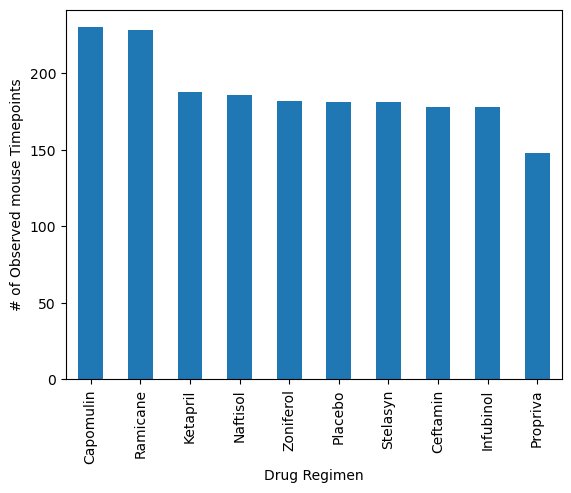

In [14]:
# all_data_unique.groupby('Drug Regimen')[['Mouse ID', 'Timepoint']].count().plot(kind='bar')
# all_data_unique.groupby('Drug Regimen')[['Mouse ID']].count().sort_values(by='').plot(kind='bar')
ax = all_data_unique.groupby('Drug Regimen')[['Mouse ID']].count().sort_values(by='Mouse ID', ascending=False).plot(kind='bar', legend=False)
ax.set_ylabel('# of Observed mouse Timepoints')
plt.show()

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


Text(0.5, 0, 'Drug Regimen')

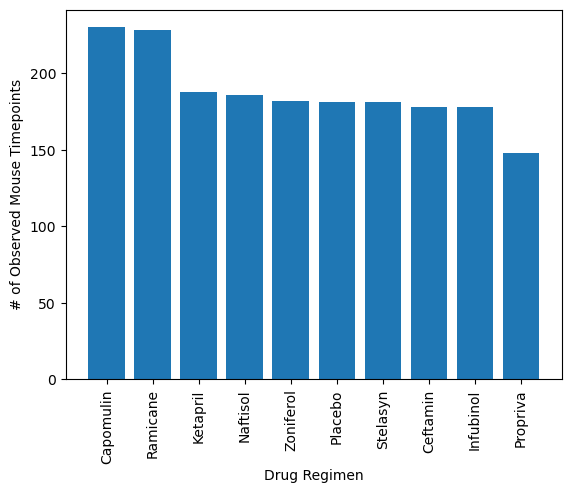

In [16]:
count_df = all_data_unique.groupby('Drug Regimen')[['Mouse ID']].count().sort_values(by='Mouse ID', ascending=False)
plt.bar(count_df.index, count_df['Mouse ID'])
plt.xticks(count_df.index, count_df.index, rotation='vertical')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


<Axes: ylabel='Sex'>

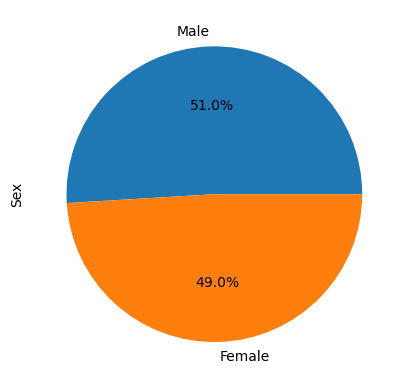

In [18]:
all_data_unique['Sex'].value_counts().plot(kind='pie', ylabel='Sex', autopct='%1.1f%%')

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


Text(0, 0.5, 'Sex')

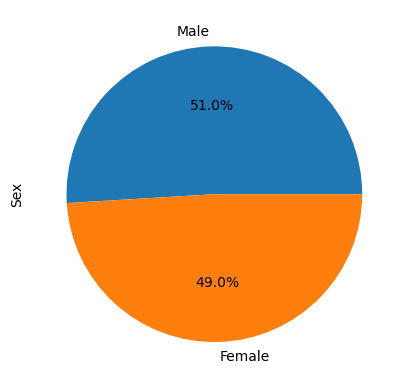

In [20]:
sex_count = all_data_unique['Sex'].value_counts()
plt.pie(sex_count, labels= sex_count.index, autopct='%1.1f%%')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_last_timepoint = all_data_unique.groupby('Mouse ID').agg({'Timepoint': 'max'})
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(all_data_unique, mouse_last_timepoint, right_index= True, left_on='Mouse ID', suffixes=['', '_greatest'])
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Timepoint_greatest
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,45
1889,z969,Naftisol,Male,9,30,30,65.841013,3,45
1890,z969,Naftisol,Male,9,30,35,69.176246,4,45
1891,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [22]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [23]:
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tum_list = []

for drug in treatment_list:
   # get the final tumor,  append to tum_list    
    # get the row for current drug
    data = merged_df[merged_df['Drug Regimen']==drug]
    # get the final tumor size
    final_tum = data[data['Timepoint'] == data['Timepoint_greatest']]
    tum_vol = final_tum['Tumor Volume (mm3)']
    tum_list.append(tum_vol)
   # find the outliers in tum_vol
    # iqr = third quartile - first quartile, lower_bound = first quartile - 1.5*iqr, upper_bound= third quartile + 1.5*iqr
    quant = tum_vol.quantile([.25, .5, .75])
    mean = quant[.5]
    q25 = quant[.25]
    q75 = quant[.75]
    iqr = q75 - q25
    lower_bound = q25 - 1.5*iqr
    upper_bound = q75 + 1.5*iqr

    # find number of outliers in tum_vol

    outliers = tum_vol[(tum_vol <= lower_bound) | (tum_vol >= upper_bound)]
    print(f'{drug}\'s potential outliers: {outliers}')
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<Axes: ylabel='Final Tumor Volume (mm3)'>

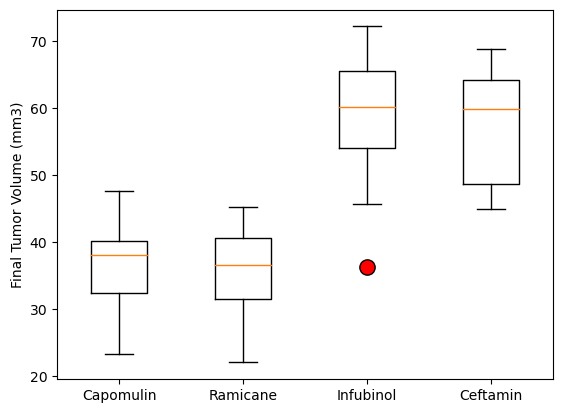

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
zipped = zip(treatment_list, tum_list)
box_data = {drug: data for drug, data in zipped}
box_df = pd.DataFrame(box_data )
# change box border color, whisker color, capline color, median line color, and outlier color
box_df.plot(kind='box', ylabel='Final Tumor Volume (mm3)', boxprops={'color': 'black', 'linewidth': 1}, \
           whiskerprops = {'color': 'black'}, capprops= {'color': 'black'}, medianprops= {'markerfacecolor': 'orange'},\
           flierprops={'markerfacecolor': 'red', 'markersize': 11})

   

## Line and Scatter Plots

<Axes: title={'center': 'Capomulin treatment of mouse l509'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

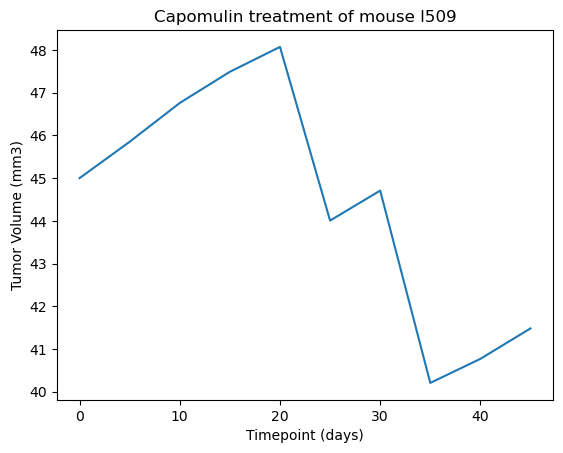

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_df = all_data_unique[all_data_unique['Drug Regimen'] == 'Capomulin']
# capo_df['Mouse ID'].unique()
mouse_capo_df = capo_df[capo_df['Mouse ID'] =='l509']
mouse_capo_df = mouse_capo_df[['Timepoint','Tumor Volume (mm3)' ]]
mouse_capo_df = mouse_capo_df.set_index('Timepoint')
mouse_capo_df.plot(title='Capomulin treatment of mouse l509', legend=False, ylabel='Tumor Volume (mm3)', xlabel='Timepoint (days)')

<Axes: title={'center': 'Average tumor size vs. Weight'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

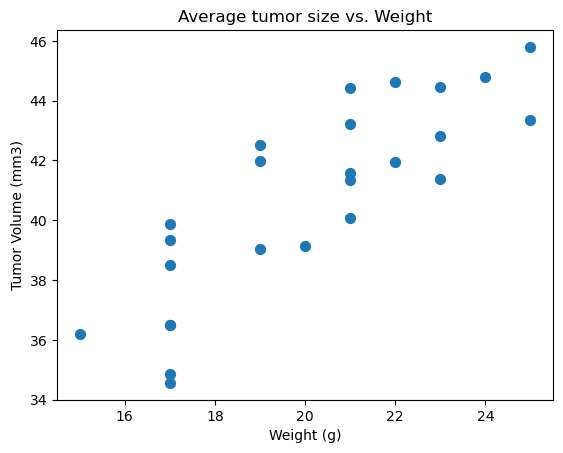

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capo_scat_df = pd.DataFrame(capo_df.groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)']].mean())
# capo_df[['Weight (g)', 'Tumor Volume (mm3)']].plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
capo_scat_df=capo_scat_df.reset_index()
# plot scatter plot with increased marker size
capo_scat_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', s=50, title='Average tumor size vs. Weight')
# # capo_scat_df
# capo_scat_df

## Correlation and Regression

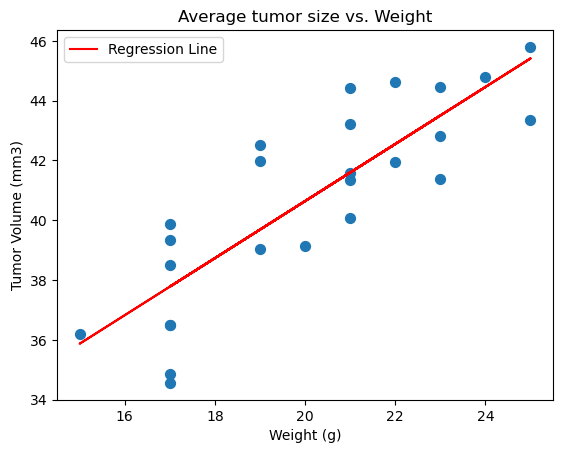

In [27]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import numpy as np
from sklearn.linear_model import LinearRegression
X = capo_scat_df['Weight (g)'].values.reshape(-1,1)
Y = capo_scat_df['Tumor Volume (mm3)'].values

model = LinearRegression()
model.fit(X,Y)

Y_pred = model.predict(X)
capo_scat_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', s=50, title='Average tumor size vs. Weight')
# plot the regression line
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.legend()
plt.show()